<a href="https://colab.research.google.com/github/BrunoBVR/DL-with-python/blob/main/5p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a convnet from scratch on a small dataset

Classifying Dogs vs. Cats images.

---

## Downloading the data

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). It can be found on Kaggle, [here](https://www.kaggle.com/c/dogs-vs-cats/data).



In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Changing to project folder for download

root_path = '/content/drive/MyDrive/DL-With-Python/Chapter5'  #change dir to your project folder


In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

In [ ]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [3]:
import os, shutil

In [ ]:
# !kaggle competitions download -c dogs-vs-cats -p /content/drive/MyDrive/DL-With-Python/Chapter5

100% 270M/271M [00:03<00:00, 100MB/s] 
100% 271M/271M [00:03<00:00, 71.2MB/s]
 99% 539M/543M [00:07<00:00, 34.1MB/s]
100% 543M/543M [00:07<00:00, 75.5MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 781kB/s]


In [ ]:
# # Unzip
# os.chdir('/content/drive/MyDrive/DL-With-Python/Chapter5')  #change dir
# !unzip -q /content/drive/MyDrive/DL-With-Python/Chapter5/train.zip -d train/

In [ ]:
# !unzip -q /content/drive/MyDrive/DL-With-Python/Chapter5/test1.zip -d test/

Checking how many training images:

In [5]:
print('Images on train set: ', len(os.listdir('/content/drive/MyDrive/DL-With-Python/Chapter5/train/train')))

Images on train set:  25000


## Copying images to training, validation and test directories

> After downloading and uncompressing it, you’ll create a new
dataset containing three subsets: a training set with 1,000 samples of each class, a vali-
dation set with 500 samples of each class, and a test set with 500 samples of each class.

In [7]:
original_dataset_dir = '/content/drive/MyDrive/DL-With-Python/Chapter5/train/train'

# This is where we'll store the smaller dataset
base_dir = '/content/drive/MyDrive/DL-With-Python/Chapter5/cats_and_dogs_small'

if not os.path.exists(base_dir):
  os.mkdir(base_dir)

# Directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
  os.mkdir(train_cats_dir)
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
  os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
  os.mkdir(validation_cats_dir)
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
  os.mkdir(validation_dogs_dir)

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
  os.mkdir(test_cats_dir)
# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
  os.mkdir(test_dogs_dir)

# # Copying first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to validation
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to test
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Copying first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to validation
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to test
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

Sanity check for files in our splits:

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building the network

In [9]:
from tensorflow.keras import layers, models

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compiling the model

In [12]:
from tensorflow.keras import optimizers

In [13]:
model.compile(loss= 'binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Data preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target dir
    target_size = (150, 150), # Resizes all images to 150x150
    batch_size = 20,
    class_mode = 'binary' # Because we are using binary_crossentropy
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Target dir
    target_size = (150, 150), # Resizes all images to 150x150
    batch_size = 20,
    class_mode = 'binary' # Because we are using binary_crossentropy
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting the model

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 563s 5s/step - loss: 0.6924 - acc: 0.5275 - val_loss: 0.6722 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6633 - acc: 0.6075 - val_loss: 0.6686 - val_acc: 0.5730
Epoch 3/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6355 - acc: 0.6485 - val_loss: 0.6369 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 16s 161ms/step - loss: 0.5873 - acc: 0.6845 - val_loss: 0.6160 - val_acc: 0.6420
Epoch 5/30
100/100 [==============================] - 16s 161ms/step - loss: 0.5415 - acc: 0.7365 - val_loss: 0.6027 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 16s 161ms/step - loss: 0.5114 - acc: 0.7475 - val_loss: 0.5738 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.4744 - acc: 0.7775 - val_loss: 0.5965 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 16s

In [17]:
model.save('cats_and_dogs_small_1.h5')

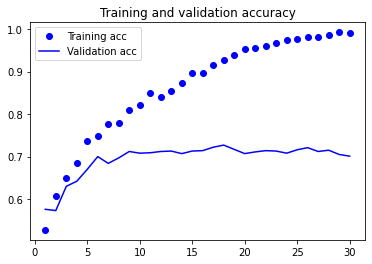

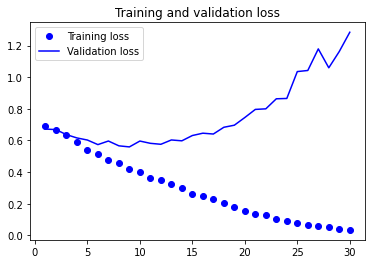

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()